K-means clustering on the spatial domain]

Apply K-means algorithm to the regular grid of a spatial domain in two dimension with varying number of clusters.

The spatial domain can be represented by two matrices where one matrix represents the horizontal index and the other matrix represents the vertical index.

Define a distance between each spatial point $(x_i, y_i)$ and a centroid $(c_x^k, c_y^k)$ for cluster k using L2-norm square and L1-norm.

Visualize the result using color coding scheme that distinguishes different clusters.

Observe the trajectory of centroid during the optimization and the shape of the clusters depending on the distance.

In [2]:
import matplotlib.pyplot as plt
from random import *
import numpy as np
import cv2

In [234]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#### Input1: rows size 100 columns size 100. 100x100

In [3]:
rows=np.array([[0]*100]*100)

for j in range(100):
    for i in range(100):
        rows[j][i]=j

columns=rows.T
rows=rows.reshape(10000)
#rows=normalize(rows)

columns=columns.reshape(10000)
#columns=normalize(columns)

c = np.vstack([rows, columns])
x_y_vector=c.T
len(x_y_vector)

10000

#### Input2: L1, L2 distance function defined

In [491]:
def l2_distance(x_y_vector, init):

    d = (x_y_vector - init) ** 2
    s = np.sum(d)
    return(s)

def l1_distance(x_y_vector, init):

    d=0
    for i in range(2):
        if ((x_y_vector[i] - init[i])>=0):
            d+=(x_y_vector[i] - init[i])
        else:
            d+=-(x_y_vector[i] - init[i])
    return(d)


#### L2 : Kmeans Algorithm Funtions. Use Average and L2 distance

In [498]:
def kmeans_label_l2(label,init,x_y_vector):
   
    z=[0]*len(init)
    for j in range(len(x_y_vector)):
        for i in range(len(init)):
            z[i]=l2_distance(x_y_vector[j],init[i])
        label[j]=np.argmin(z)
    
    return label


def Kmeans_algorithm_l2(label,centriod_value,init,x_y_vector):
    
    many=0
    kmeans_label_l2(label,init,x_y_vector)
    avg_label=np.array([0]*len(x_y_vector))
    centroid_init=np.array([[0]*2]*len(init))
    avg_label=np.copy(label)
    
    while(1):
        
        cnt=[0]*len(init)
        label=np.copy(avg_label)
        centroid_init=np.array([[0]*2]*len(init))
        avg_label=np.array([0]*len(x_y_vector))
        centriod_value=np.array([[0]*2]*10000)

        
        for k in range(len(label)):
            centroid_init[label[k]]+=x_y_vector[k]
            cnt[label[k]]+=1
            
        for l in range(len(init)):
            if (cnt[l]!=0):
                centroid_init[l]=centroid_init[l]/cnt[l]
        
        
        kmeans_label_l2(avg_label,centroid_init,x_y_vector)
                
        many+=1
        
        if(np.array_equal(label,avg_label)):
            break
        
        for i in range(len(label)):
            for j in range(len(init)):
                if (avg_label[i]== j):
                    centriod_value[i]= centroid_init[j]
                     
    #    list_ener[many-1]= energy_func(rowsorcolumns,centroid_init,avg_label,ener_sum)

        
        print("Iteration Number:",many)
        rgb_label=np.array([[0]*3]*10000)

        for i in range(len(label)):
            if label[i]==0:
                rgb_label[i]=[255,127,80]
            elif label[i]==1:
                rgb_label[i]=[255,215,0]
            elif label[i]==2:
                rgb_label[i]=[30,144,255]
            elif label[i]==3:
                rgb_label[i]=(218,112,214)
            elif label[i]==4:
                rgb_label[i]=(210,180,140)
            else:
                rgb_label[i]=(255,228,225)

        rgb_label=rgb_label.reshape(100,100,3)

        plt.imshow(rgb_label)
        plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
        plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
        plt.show()
        
        plt.figure()
        centriod_value=np.array(centriod_value.T)
        print(centriod_value[0])

        plt.scatter(centriod_value[0],centriod_value[1])
        plt.show()
    print("Iteration Number:",many)
        
    print(centroid_init)
                    
    return centriod_value
                

#### Visualization L2: The result using color coding scheme and  The trajectory of centroid

[[52  9]
 [59 25]
 [73 69]]
Iteration Number: 1


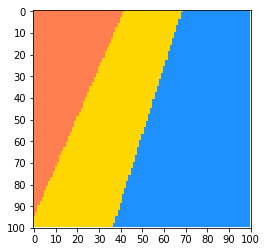

[31 31 31 ... 55 55 55]


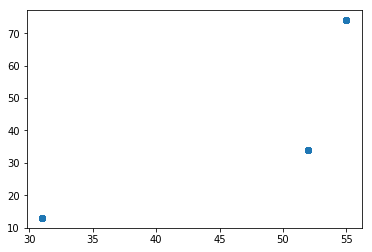

Iteration Number: 2


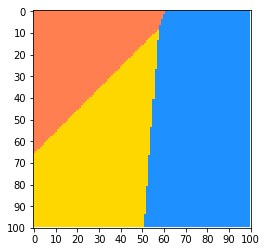

[21 21 21 ... 51 51 51]


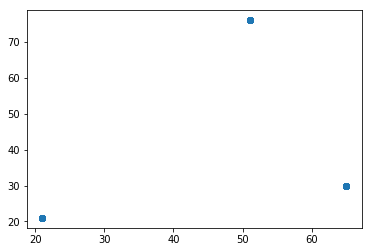

Iteration Number: 3


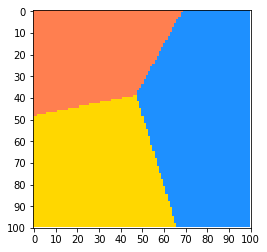

[20 20 20 ... 49 49 49]


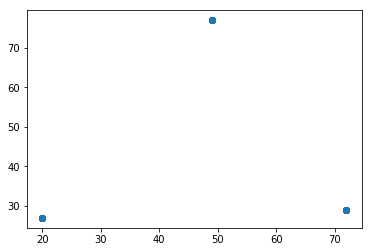

Iteration Number: 4


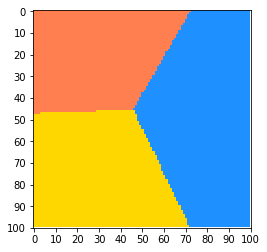

[21 21 21 ... 49 49 49]


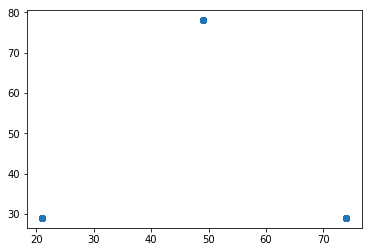

Iteration Number: 5


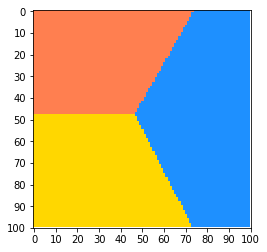

[21 21 21 ... 49 49 49]


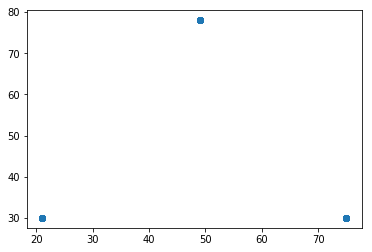

Iteration Number: 6


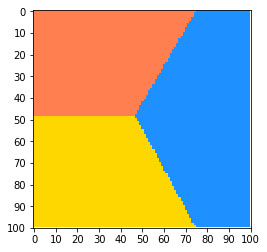

[22 22 22 ... 49 49 49]


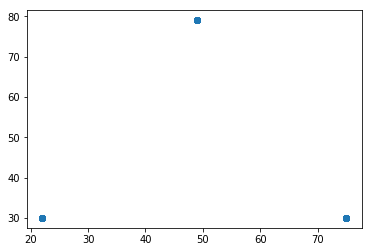

Iteration Number: 7
[[22 30]
 [75 30]
 [49 79]]


In [499]:
label=np.array([0]*10000)
k=3
centriod_value=np.array([[0]*2]*10000)
init=np.array([[0]*2]*k)


for i in range(k):
        init[i]= [np.random.randint(0,99),np.random.randint(0,99)]
print(init)
        
centriod_value_l2=Kmeans_algorithm_l2(label,centriod_value,init,x_y_vector)


(0,0,255) blue
(255,0,0) Red
(0,128,0) green
(128,0,128) purple
(0,0,0)black
(255,165,0) orange
(255,127,80) coral
(255,215,0) gold
(30,144,255)cornflowerblue
(255,192,203)pink
(218,112,214)orchid

#### L1 : Kmeans Algorithm Funtions. Use Median and L1 distance

In [567]:
def kmeans_label_l1(label,init,x_y_vector):
   
    z=[0]*len(init)
    for j in range(len(x_y_vector)):
        for i in range(len(init)):
            z[i]=l1_distance(x_y_vector[j],init[i])
        label[j]=np.argmin(z)
    
    return label



def getMedian(x):
    n=len(x)
    if n%2==1:
        result=x[int((n-1)/2)]

    else:
        result=(x[int(n/2)-1]+x[int(n/2)])/2

    return result
    
    

def Kmeans_algorithm_l1(label,centroid_value_l1,init,x_y_vector):
    
    many=0
    kmeans_label_l1(label,init,x_y_vector)
    avg_label=np.array([0]*len(x_y_vector))
    centroid_init=np.array([[0]*2]*len(init))
    avg_label=np.copy(label)
    
    while(1):
        
        cnt=np.array([0]*len(init))
        label=np.copy(avg_label)
        centroid_init=np.array([[0]*2]*len(init))
        avg_label=np.array([0]*len(x_y_vector))
        centroid_value_l1=np.array([[0]*2]*10000)
        
        
        for k in range(len(label)):
            cnt[label[k]]+=1
        

        for i in range(len(init)): #3번반복
            c=0
            if (cnt[i]!=0):
                median=np.array([[0]*2]*cnt[i])
                for k in range(len(label)):
                    if (label[k]==i):
                        median[c]=x_y_vector[k]
                        c+=1
                centroid_init[i]= getMedian(median)

        kmeans_label_l1(avg_label,centroid_init,x_y_vector)
                

        many+=1
        print("Iteration Number:",many)
        
        if(np.array_equal(label,avg_label)):
            break
        
        for i in range(len(label)):
            for j in range(len(init)):
                if (avg_label[i]== j):
                    centroid_value_l1[i]= centroid_init[j]
                    
        rgb_label=np.array([[0]*3]*10000)

        for i in range(len(label)):
            if label[i]==0:
                rgb_label[i]=[255,127,80]
            elif label[i]==1:
                rgb_label[i]=[255,215,0]
            elif label[i]==2:
                rgb_label[i]=[30,144,255]
            elif label[i]==3:
                rgb_label[i]=(218,112,214)
            elif label[i]==4:
                rgb_label[i]=(210,180,140)
            else:
                rgb_label[i]=(255,228,225)

        rgb_label=rgb_label.reshape(100,100,3)

        plt.imshow(rgb_label)
        plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
        plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
        plt.show()
        
        
        plt.figure()
        centroid_value_l1=centroid_value_l1.T
        plt.scatter(centroid_value_l1[0],centroid_value_l1[1])
        plt.show()
        
        if(many==10):
            break


        
    print("Iteration Number:",many)
        
    
                    
    return centroid_value_l1

#### Visualization L1: The result using color coding scheme and  The trajectory of centroid

[[13 57]
 [41 92]
 [68 19]]
Iteration Number: 1


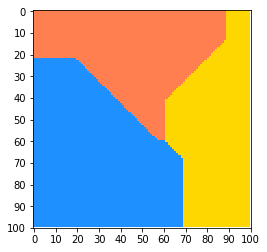

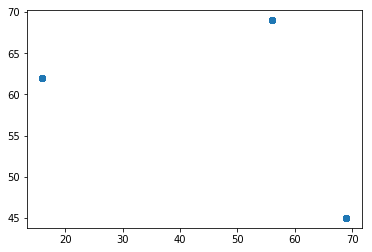

Iteration Number: 2


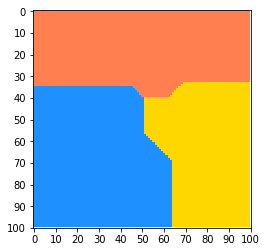

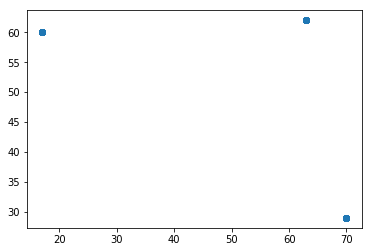

Iteration Number: 3


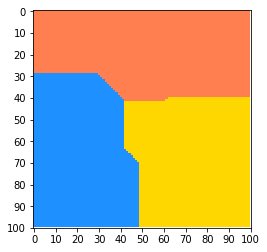

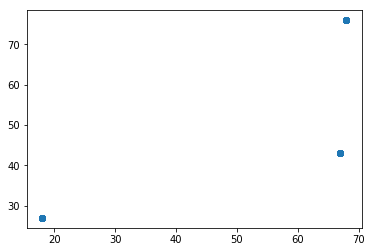

Iteration Number: 4


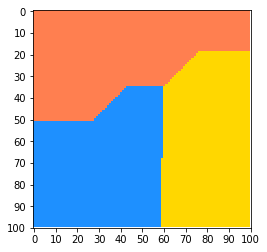

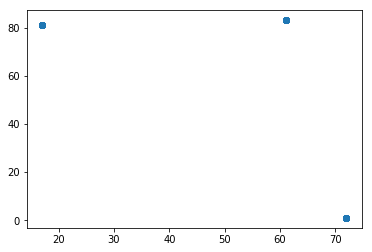

Iteration Number: 5


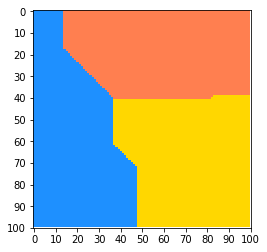

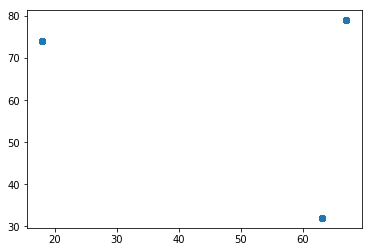

Iteration Number: 6


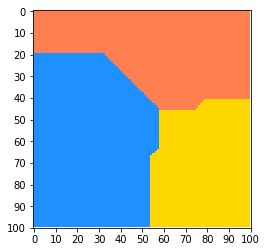

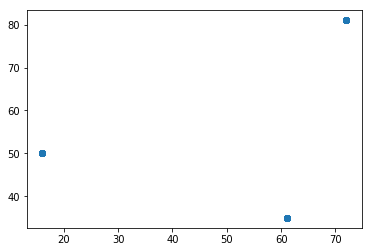

Iteration Number: 7


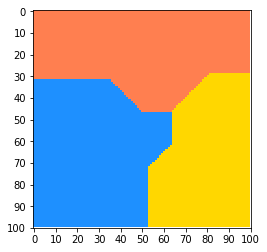

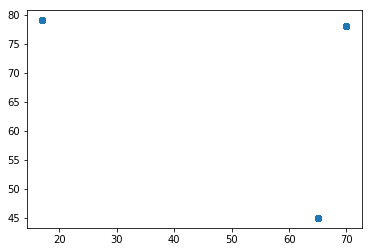

Iteration Number: 8


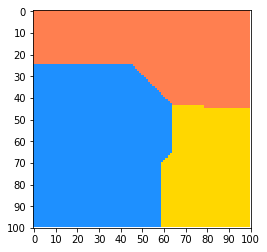

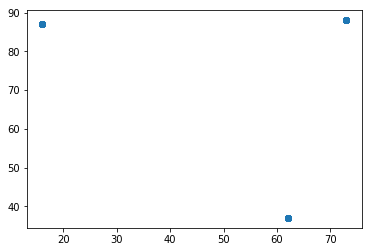

Iteration Number: 9


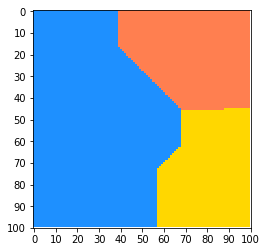

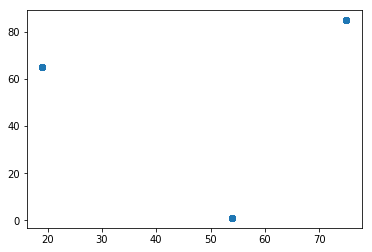

Iteration Number: 10


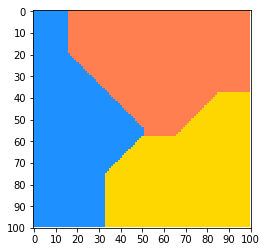

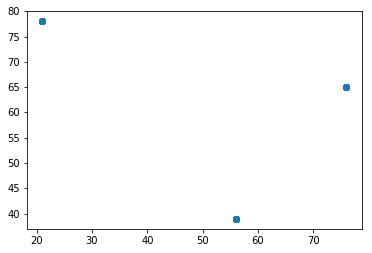

Iteration Number: 10


In [568]:
label=np.array([0]*10000)
k=3
centroid_value_l1=np.array([[0]*2]*10000)
init=np.array([[0]*2]*k)

for i in range(k):
        init[i]= [np.random.randint(0,99),np.random.randint(0,99)]
print(init)
        
centroid_value_l1=Kmeans_algorithm_l1(label,centroid_value_l1,init,x_y_vector)
